<h1><center>ShopSmart Customer Analysis</center></h1>
<center><img src="https://www.leadsquared.com/wp-content/uploads/2021/11/Customer-Analysis-1.jpg" align="center"/></center>

### Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Configuration
* 3 Data wrangling
  * 3.1 Loading and merging operation
  * 3.2 Data cleaning
      * 3.2.1 Duplicates
  * 3.3 Feature Engingeering
* 4 Data Analysis
  * 4.1 Site Interactions
      * 4.1.1 Chronological Sequence of Customer Engagement
      * 4.1.2 Ranking Of Site Activities
      * 4.1.3 Top customers by Site interactions
      * 4.1.4 Product Interactions on the Website
      * 4.1.5 Duration Of Site visits
      * 4.1.6 Revenue from site interactions
         * 4.1.6.1 Monetary value of Site visits
	       * 4.1.6.2 Top customers by Spending during
         * 4.1.6.3 Customer bb7fd0af
         * 4.1.6.4 Statistics of Site revenue
         * 4.1.6.5 Top product by Revenue generated
         * 4.1.6.6 Top product by Quantity sold
  * 4.2 Geographical Location
      * 4.2.1 Customer location
      * 4.2.2 Revenue by Location
      * 4.2.3 Location Revenue Statistics
      * 4.2.4 Top Selling Product by Location
* 5 Insights
  


# 1 Introduction
The objective of this notebook is to conduct a comprehensive analysis of the data gathered from the ShopSmart website. The aim is to uncover valuable insights into how customers interact with the site, their buying behaviors, and their product preferences.

### In this notebook, I am going to try to answer a few questions:

#### A. Visit Frequency
1. Determine the frequency of the customer's visits to the website based on the available data.
2. Identify any patterns or trends in the frequency of the customer's visits.

#### B. Location Analysis
1. Ascertain the customer's location using the provided data.
2. Analyze how the customer's location might influence their purchasing behavior.

#### C. Overall Purchase Behavior
1. Draw insights about the customer's overall behavior on the website using the provided data.
2. Discuss how these insights could inform marketing strategies or personalized recommendations for this customer.

### Data Sources:
The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.


### GitHub Project Repository :
* [ShopSmart Data Analysis](https://github.com/SaliuA/ShopSmart_Customer_analysis)

This project also serves as an assessment for the Data Science course at AltSchool.
* [Alt school Data science](https://altschoolafrica.com/)

### Summary & Insights:
The exploratory data analysis of the ShopSMart data revealed the following actionable insights:

* **Uniform Engagement Distribution:**<br>
Initially, customer engagement with the website was evenly distributed.
However, there was a significant surge in site activities starting on the 29th.
Investigate the cause of this sudden increase and consider amplifying the actions that led to it.

* **Top-Performing Product:**<br>
The Canon EOS R5 Camera emerged as the top performer, leading in customer interactions, unit sales, and revenue generation. This product drew an impressive 39,715 interactions and amassed a staggering $8,923,978 in revenue. In contrast, the Nintendo Switch, despite being the least sold item, still managed to earn a commendable $567,281. The Coca-Cola 12-pack, even though it sold 2124 units, generated the lowest revenue at $12,722.76. The store should capitalize on the popularity of the Canon EOS R5 camera to boost revenue, while also ramping up marketing efforts for the Nintendo Switch and Coca-Cola 12-pack.

* **Average Interaction Duration:**<br>
On average, customers spent 4.0 days interacting with the site.
Use this insight to optimize user experience and encourage longer engagement.

* **Order Success Rate Optimization:**<br>
Currently, successful orders account for only 33.3% of all orders on the site.
Efforts should be made to increase this percentage and improve order success rates.

* **Revenue and Loss Insights**:<br>
The store revenue during the dataset period was $22,760,347.
However, $44,682,020 in potential revenue was lost due to failed and canceled orders.
Focus on minimizing failed/canceled orders to maximizing revenue.

* **Spending Distribution**:<br>
The average amount spent by customers is $2,133.
While most customers spend below $2,500, there are outliers with significantly larger spending.
Consider strategies to attract more high-spending customers.

* **Revenue from Countries**:<br>
The average revenue from countries is $93,664.
Singapore emerges as the standout revenue contributor, generating an impressive $252,275.
Conversely, Slovenia trails behind, contributing a mere $180.
Focus on underperforming markets with high interaction levels (e.g., Argentina) to boost revenue.

* **Valued Customer Identification**:<br>
Customer bb7fd0af stands out as the most valued, spending $44,417 on the site.
Nurture relationships with high-value customers.

# 2 Libraries & Configurations

## 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [657]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
import geopandas as gpd
from datetime import datetime #for 
from scipy import stats     # for statistics
from IPython.display import Markdown, display # for markdown function
import json

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))
#function to check for number of rows and colunms
def shape(df):
    print(f"There are {df.shape[0]:,} rows and {df.shape[1]} columns")
#function to format strings in my dataframe
def string_format(df,col):
    df[col] = df[col].apply(lambda x: x.split("-")[0])
#function to drop redundant colunms
def col_to_drop(df, columns):
    """
    Drops columns from a DataFrame with the axis set to 1 and inplace set to True.

    Parameters:
    - df: Pandas DataFrame
    - columns: A list containing columns to be dropped

    Returns:
    - Remaining the colunms in the pandas dataframe
    """
    if isinstance(columns, list):
        for column in columns:
            try:
                df.drop(column, axis=1, inplace=True)
            except KeyError:
                print(f"{column} does not exist in the DataFrame")
        shape(df)
        return df.columns
    else:
        print("Please enter a list of columns to be dropped")
#function to check the dtype in the pandas column
def check_type(df):
    obj = len(df.select_dtypes(include=['object']).columns)
    num = len(df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns)
    print(f"The dataframe has {obj} object type columns and {num} numeric type columns")

#function to drop redundant colunms
# pio.renderers.default='notebook' # to display plotly graph
%matplotlib inline

## 2.2 Configurations
Setting the configurations to be used for our analysis.

In [658]:
# padding value
left_padding = 21
# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid")

<a id='3'></a>
# 3 Data Wrangling

## 3.1 Loading and Merging operation
Loading the various dataset containing different data required for our analysis and merging them to form one complete dataset for easier analysis.

In [659]:
#loading the datasets
df_customers=pd.read_csv("customers.csv")
df_events=pd.read_csv("events.csv")
df_line_items=pd.read_csv("line_items.csv")
df_orders=pd.read_csv("orders.csv")
df_products=pd.read_csv("products.csv")
#viewing the datasets
display(df_customers.head())
display(df_events.head())
display(df_line_items.head ())
display(df_orders.head())
display(df_products.head())

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


Merging the 5 datsets to form one complete dataset for better analysis

In [660]:
#merging the datasets
df_products = df_products.rename(columns={'id': 'item_id'})#renaming item colunm of the product dataset for merging operation
df_merge = df_customers.merge(df_events,on="customer_id").merge(df_orders,on="customer_id").merge(df_line_items,on="order_id").merge(df_products,on="item_id")#merging the datasets
df_merge.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [661]:
#checking the shape of the dataset
shape(df_merge)

There are 578,320 rows and 15 columns


In [662]:
#checking  information on our dataset colunms
df_merge.info()
check_type(df_merge)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB
The dataframe has 10 objec

## 3.2 Data cleaning

Performing wrangling and cleaning operations on the dataframe for more concise analysis. The data set has no missing values.

In [663]:
#creating a copy of our merged dataset
df_clean= df_merge.copy()

In [664]:
#checking for missing values.
df_clean.isna().sum()
printmd("**There are no missing values**")

**There are no missing values**

### 3.2.1 Duplicates

checking for duplicated values in the dataframe reveals there are no duplicated rows and colunms but some colums while not being duplicates present the same information and would be dropped.

In [665]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_clean.index),len(df_clean.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 578320
Unique observations: 578320


**No duplicates Found!**

In [666]:
#checking unique values
printmd("**Unique Values By Features**")
for feature in df_clean.columns:
    uniq = (df_clean[feature]).nunique()
    print(feature.ljust(left_padding),uniq)

**Unique Values By Features**

customer_id           4594
device_id             4594
location              243
currency              3
event_id              72570
event_data            71881
event_timestamp       70287
order_id              4594
status                3
checked_out_at        4594
line_item_id          31741
item_id               15
quantity              5
name                  15
price                 14


In [667]:
#Dropping duplicate colunms
col_to_drop( df_clean,["device_id","item_id","currency"])

There are 578,320 rows and 12 columns


Index(['customer_id', 'location', 'event_id', 'event_data', 'event_timestamp',
       'order_id', 'status', 'checked_out_at', 'line_item_id', 'quantity',
       'name', 'price'],
      dtype='object')

## 3.3 Feature Engineering

Adding additional colunms from existing data to our dataframe for better insights into our customer behavior. Event type, order duration and order amount column were created

In [668]:
#creating a copy of the dataset from the cleaning and duplicate operation
df_feature = df_clean.copy()

In [669]:
#formating colunm data for better analysis
string_format(df_feature,"customer_id")
string_format(df_feature,"order_id")

In [670]:
#creating an event type colunm to track the activities of the customers on the website
df_feature['event_type'] = df_feature['event_data'].apply(lambda x: json.loads(x)['event_type'])
col_to_drop(df_feature,["event_data"]) #dropping the event_data colunm after creating the event type column due to redundancy of the colunmm

There are 578,320 rows and 12 columns


Index(['customer_id', 'location', 'event_id', 'event_timestamp', 'order_id',
       'status', 'checked_out_at', 'line_item_id', 'quantity', 'name', 'price',
       'event_type'],
      dtype='object')

In [671]:
#Transforming the event_timestamp and checked_out_at colunms to datetime objects for better analysis
df_feature['event_timestamp']=pd.to_datetime(df_feature['event_timestamp'])
df_feature['checked_out_at']=pd.to_datetime(df_feature['checked_out_at'])

In [672]:
#Adding an amount spent colunm and order duration colunm
df_feature["order_amount"]=df_feature["quantity"]*df_feature["price"] #multiplying price by quantity to get amount

In [673]:
#re-arranging the colunms for better visualize the dataframe
df_feature=df_feature.reindex(columns=['customer_id', 'location', 'event_id', 'event_timestamp', 'order_id',
    'event_type','status','checked_out_at','line_item_id','name','quantity', 'price','order_amount'])

Taking a look at the dataframe after the feature engineering operation.

In [674]:
#viewing the dataframe
df_feature.head()

,customer_id,location,event_id,event_timestamp,order_id,event_type,status,checked_out_at,line_item_id,name,quantity,price,order_amount
0,cda7bec0,Saint Helena,14786,2024-03-26 22:05:58.863661,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
1,cda7bec0,Saint Helena,14787,2024-03-27 07:14:33.987347,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
2,cda7bec0,Saint Helena,14788,2024-03-30 04:03:10.406559,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
3,cda7bec0,Saint Helena,14789,2024-03-30 04:03:10.406561,9e950ce3,visit,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
4,cda7bec0,Saint Helena,14790,2024-03-30 04:03:10.406769,9e950ce3,add_to_cart,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98


The dataset as been cleaned and wrangled is ready for exploration and anlysis

# 4 Data Analysis

The cleaned and wrangled dataset was explored and revealed several actionable insights for ShopSmart.

In [675]:
#making a copy of the cleand and wrangled dataset
df= df_feature.copy()

## 4.1 Site Interactions
Exploring customer interactions with ShopSmart website

### 4.1.1 Chronological Sequence of Customer Engagement
Let’s visualize customer engagement on the website over the duration of our dataset

In [676]:
#First lets look at the timefram eof our analysis
date_min= df["event_timestamp"].dt.date.min()
date_max=df["checked_out_at"].dt.date.max()
printmd(f"The datasets starts on the {date_min} and ends on the {date_max}")

The datasets starts on the 2024-03-19 and ends on the 2024-03-30

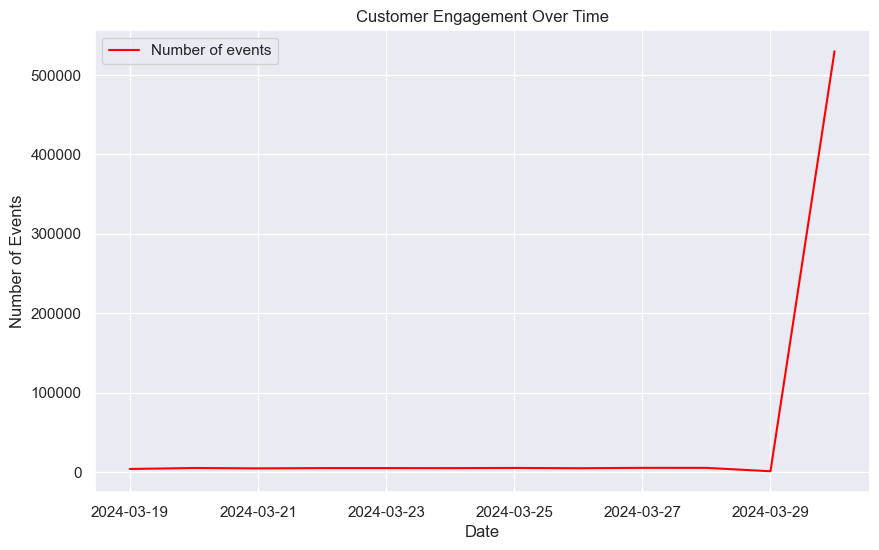

Customer engagement on the website was evenly spread out from the 19th, but a notable increase in site activities was observed from     the 29th onwards. The specific actions that triggered this surge         in engagement on the 29th should be identified and intensified.

In [677]:
#creating a copy
df_time=df.copy()
df_time.set_index('event_timestamp', inplace=True) # Set timestamp as index

# Resample data to daily frequency, counting the number of events each day
daily_counts = df_time.resample('D').count()

plt.figure(figsize=(10,6))
plt.plot(daily_counts['event_id'], label='Number of events',color="red")
plt.title('Customer Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()
printmd("Customer engagement on the website was evenly spread out from\
 the 19th, but a notable increase in site activities was observed from\
     the 29th onwards. The specific actions that triggered this surge\
         in engagement on the 29th should be identified and intensified.")

### 4.1.2 Ranking Of Site Activities

Customers visit the website for different reasons, lets look at the disttribution of customer activities on the website

,event_type,count
0,add_to_cart,269335
1,visit,143154
2,remove_from_cart,134090
3,checkout,31741


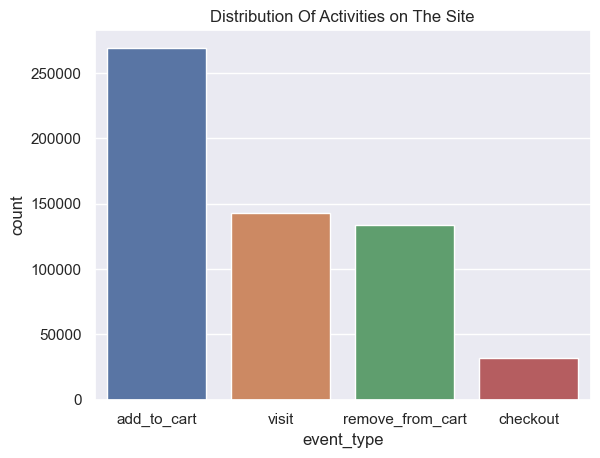

The visualization revealed the most activity on the site was **add_to_cart** with **checkout** being the least.

In [678]:
#checking the frequency of customer actions on the website
df_event=df["event_type"].value_counts().reset_index()
display(df_event)
sns.barplot(x='event_type', y='count', hue='event_type', data=df_event)
plt.title('Distribution Of Activities on The Site')
plt.show()
printmd("The visualization revealed the most activity on the site was **add_to_cart** with **checkout** being the least.")

### 4.1.3 Top customers by Site interactions
lets look at the amount of times different customers interacted with the site 

In [679]:
#value count of customer_id
df_visit=df["customer_id"].value_counts().reset_index()
display(df_visit)
plt.show()
printmd(f"Customer {df_visit["customer_id"].iloc[0]} visited the site  {df_visit["count"].iloc[0]} times between the {df["event_timestamp"].min().day}th and {df["event_timestamp"].max().day}th of March 2024.The customer\
 tops the chart for the customer with the most site interaction within that timeframe.")


,customer_id,count
0,eb7dcb88,372
1,a7d9058a,360
2,12e94262,360
3,ebcea232,360
4,c391f179,360
...,...,...
4589,dc9500b1,3
4590,48139381,3
4591,4e412d78,3
4592,81d65a2c,3


Customer eb7dcb88 visited the site  372 times between the 19th and 30th of March 2024.The customer tops the chart for the customer with the most site interaction within that timeframe.

### 4.1.4 Product Interactions on the Website
Lets get an insight into product interaction on the website.The table would reveal which product got the most interaction from customers

,name,count
0,Canon EOS R5 Camera,39715
1,Fitbit Charge 4,39268
2,Sony WH-1000XM4 Headphones,39162
3,Dell XPS 13 Laptop,39084
4,Samsung Galaxy S21,38997
5,iPhone 13,38866
6,Microsoft Xbox Series X,38842
7,Adidas Ultraboost,38835
8,Nike Air Max 270,38782
9,Coca-Cola 12-Pack,38440


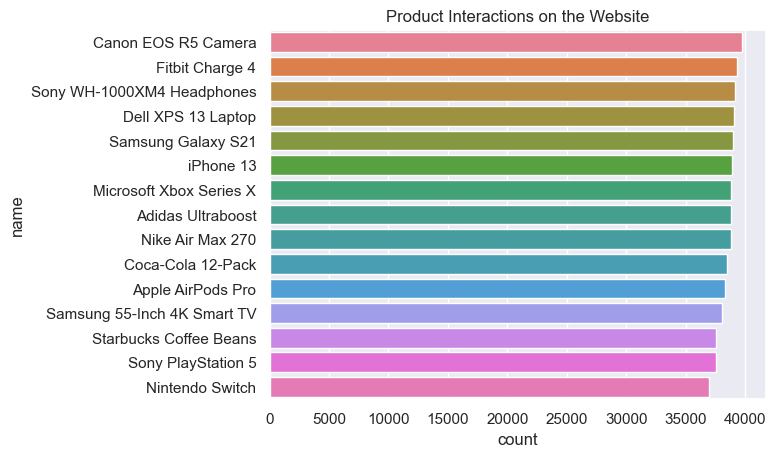

**Canon EOS R5 Camera** had the most customer interactions. customers interacted with this prodcut **39715** times while Nintendo Switch had the least interactions at 36979 

In [680]:
#checking the products the customers click on the most
df_product=df["name"].value_counts().reset_index()
display(df_product)
sns.barplot(y='name', x='count', hue='name', data=df_product)
plt.title('Product Interactions on the Website')
plt.show()
printmd(f"**{df_product["name"].iloc[0]}** had the most customer interactions. customers interacted with this prodcut **{df_product["count"].iloc[0]}** times while {df_product["name"].iloc[-1]} had the least interactions at {df_product["count"].iloc[-1]} ")

### 4.1.5 Duration Of Site interactions
order duration is the time betwen when a customers frist visits the site and when he succesfully/unsuccesfully checksout the order. Lets take a look at the distribution of the duration

* Succesfull checkout

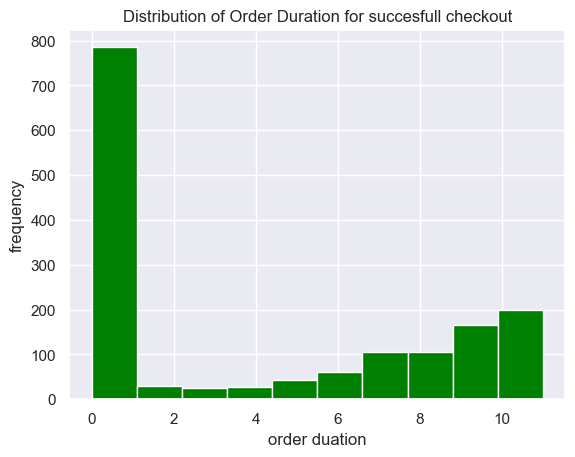

The average the duration of succesfull checkouts on the sites is 4.0 days, more needs to be done to bring order duration down

In [681]:
# Filter for successful orders
df_success = df[df['status'] == 'success']

# Get the first visit time and checkout time for each order
df_grouped = df_success.groupby(['customer_id', 'order_id','event_type']).agg({'event_timestamp': 'min'}).unstack()

# Calculate the order duration
df_grouped['order_duration'] = (df_grouped['event_timestamp']['checkout'] - df_grouped['event_timestamp']['visit']).dt.days
df_grouped["order_duration"].hist(color="green")
plt.title('Distribution of Order Duration for succesfull checkout')
plt.xlabel('order duation')
plt.ylabel('frequency')
plt.show()
avg=round(df_grouped["order_duration"].mean(),0)
printmd(f"The average the duration of succesfull checkouts on the sites is {avg} days, more needs to be done to bring order duration down")

* unsuccesful checkout

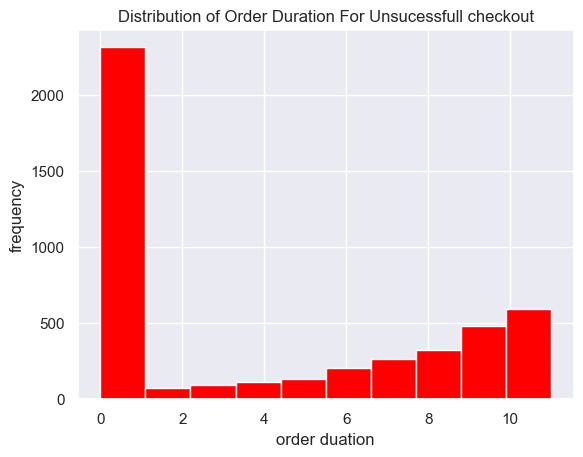

The average the duration of unsuccesfull checkouts on the sites is 4.0 days

In [682]:
# Filter for unsuccessful orders
df_unsuccess = df[df['status'] != 'sucess']

# Get the first visit time and checkout time for each order
df_grouped = df_unsuccess.groupby(['customer_id', 'order_id','event_type']).agg({'event_timestamp': 'min'}).unstack()

# Calculate the order duration
df_grouped['order_duration'] = (df_grouped['event_timestamp']['checkout'] - df_grouped['event_timestamp']['visit']).dt.days
df_grouped["order_duration"].hist(color="red")
plt.title('Distribution of Order Duration For Unsucessfull checkout')
plt.xlabel('order duation')
plt.ylabel('frequency')
plt.show()
avg=round(df_grouped["order_duration"].mean(),0)
printmd(f"The average the duration of unsuccesfull checkouts on the sites is {avg} days")

Average time for a customer to succesfully or unsuccesfully checkout an item from the websites is 4 days.

### 4.1.6 Revenue from site interactions
lets look at the spending patterns of customers who visit the website

* Proportion of Succesfull, failed and cancled orders during Site visits

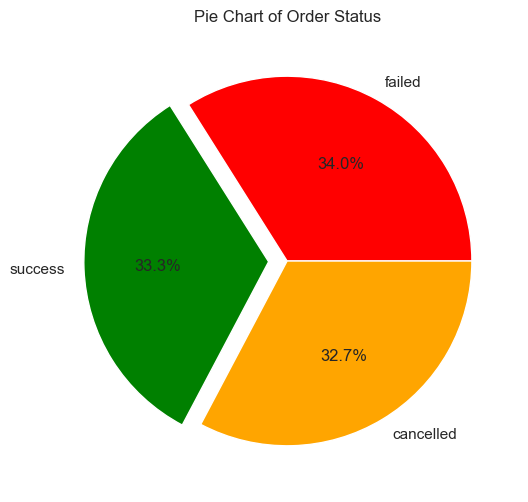

The succesfull orders on the store account for **33.3%** of all visits to the store within the 19th and 30th of march 2024. More has to be done to bring the percentage up

In [683]:
df_status=df["status"].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
explode = (0, 0.1, 0)
color=["red","green","orange"]
plt.pie(df_status, labels=status_counts.index, autopct='%1.1f%%',explode=explode,colors=color)
plt.title('Pie Chart of Order Status')
plt.show()
printmd("The succesfull orders on the store account for **33.3%** of all visits to the store within the 19th and 30th of march 2024. More has to be done to bring the percentage up")

### 4.1.6.1 Monetary value of Site visits


,status,order_amount
0,cancelled,22114714.20
1,failed,22567306.30
2,success,22760347.19


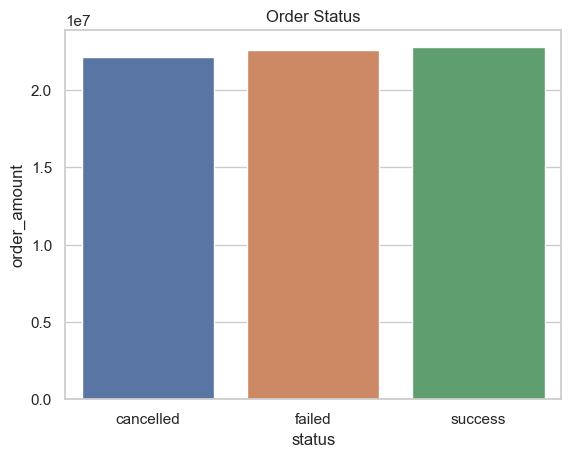

The store revenue within the time period of the dataset was **$22,760,347**. The sum of **$44,682,020** was lost to failed and canceled orders

In [684]:
df_checkout= df[df["event_type"]=="checkout"]
order_amount=df_checkout.groupby("status")["order_amount"].sum().reset_index()
display(order_amount)
sns.barplot(x="status",y="order_amount",hue="status",data=order_amount)
plt.title("Order Status")
plt.show()
revenue = df_checkout.loc[df_checkout['status'] == 'success', 'order_amount'].sum()
lost_revenue =df_checkout.loc[df_checkout['status'] != 'success', 'order_amount'].sum()
formatted_revenue = "{:,}".format(round(revenue))
formatted_lost_revenue = "{:,}".format(round(lost_revenue))
printmd(f"The store revenue within the time period of the dataset was **${formatted_revenue}**. The sum of **${formatted_lost_revenue}** was lost to failed and canceled orders")

### 4.1.6.2 Top customers by Spending during Site visits
   <p>From our previous analysis, we have seen the customer who interacts with the site the most, now lets look a the customer who spends the most on the site within the alloted timeframe</p>

,customer_id,order_amount
0,bb7fd0af,41417.41
1,df4cf418,41129.38
2,3c8e3261,41129.37
3,662af3bb,40451.58
4,90e76254,40249.41
...,...,...
1543,fd960258,29.95
1544,655402da,29.95
1545,2ea8d429,29.95
1546,8ef3e5a2,23.96


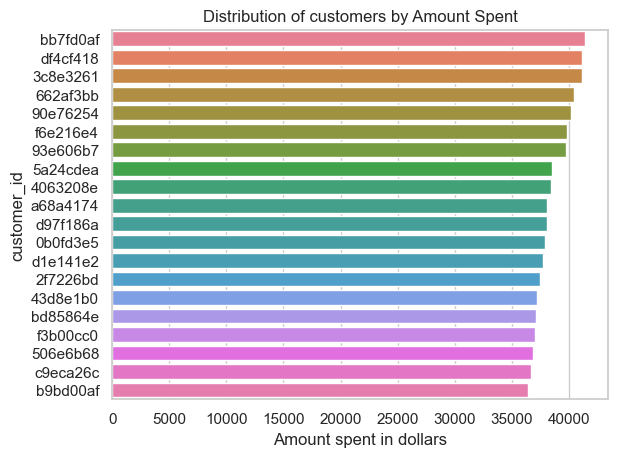

The customer who spent the most on the website is customer **bb7fd0af** with an amount of $41,417

In [685]:
#grouping by customer id
df_checkout_success= df_checkout[df_checkout['status']=="success"]
df_amount=df_checkout_success.groupby("customer_id")["order_amount"].sum().sort_values(ascending=False).reset_index()
display(df_amount)
sns.barplot(y="customer_id",x="order_amount",hue="customer_id",data=df_amount.head(20))
plt.title("Distribution of customers by Amount Spent")
plt.xlabel("Amount spent in dollars")
plt.show()
printmd(f"The customer who spent the most on the website is customer **bb7fd0af** with an amount of $41,417")

### 4.1.6.3 Customer bb7fd0af
Customer b7fd0af deserves a special look for spending $41,417 at ShopSmart

In [686]:
#subsetting for customer bb7fd0af
display(df[(df["customer_id"]=="bb7fd0af") & (df["event_type"]=="checkout")].sort_values(by="order_amount",ascending=False))
printmd("The customer with the ID bb7fd0af, hailing from Taiwan, emerged as the highest spender on the site. His most significant purchase was 5 units of the Canon EOS R5 Camera.")

,customer_id,location,event_id,event_timestamp,order_id,event_type,status,checked_out_at,line_item_id,name,quantity,price,order_amount
208002,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16571,Canon EOS R5 Camera,5,3999.99,19999.95
402842,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16561,Dell XPS 13 Laptop,5,1299.99,6499.95
480594,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16567,Samsung 55-Inch 4K Smart TV,5,799.99,3999.95
441974,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16572,Samsung Galaxy S21,3,899.99,2699.97
556538,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16569,Sony PlayStation 5,5,499.99,2499.95
364065,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16564,iPhone 13,2,1099.99,2199.98
16536,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16568,Microsoft Xbox Series X,2,499.99,999.98
93223,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16565,Nintendo Switch,3,299.99,899.97
286023,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16570,Fitbit Charge 4,5,149.95,749.75
169843,bb7fd0af,Taiwan,77067,2024-03-30 04:09:13.742352,70441ff8,checkout,success,2024-03-30 04:09:13.742352,16566,Adidas Ultraboost,4,180.00,720.00


The customer with the ID bb7fd0af, hailing from Taiwan, emerged as the highest spender on the site. His most significant purchase was 5 units of the Canon EOS R5 Camera.

### 4.1.6.4 Statistics of Site revenue

* Average amount spent

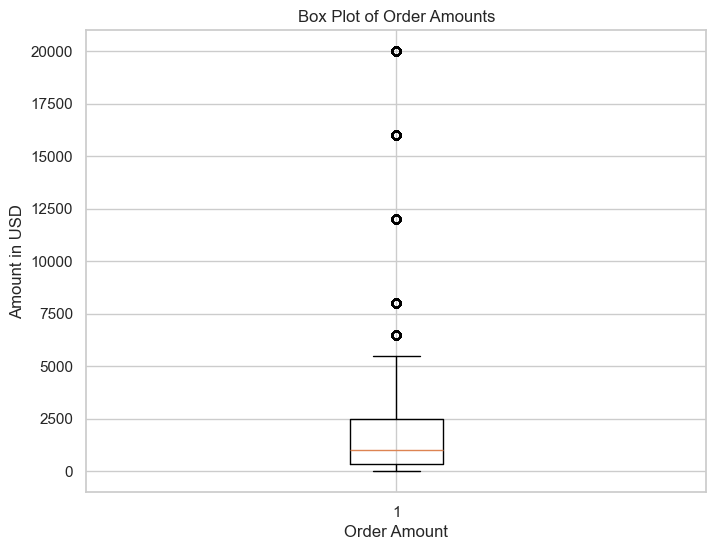

The average amount spent on the website is **$2,133**, with a minimum  amount of **$6** and maximum   amount of **$20,000**. **75%** of    the orders fall below **$2,500** dollars

In [687]:
#order statistics
avg_amount=df_checkout_success["order_amount"].mean()
min_amount=df_checkout_success["order_amount"].min()
max_amount=df_checkout_success["order_amount"].max()
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create the box plot
plt.boxplot(df_checkout_success["order_amount"])

# Customize the plot (add labels, title, etc.)
plt.xlabel("Order Amount")
plt.ylabel("Amount in USD")
plt.title("Box Plot of Order Amounts")
plt.show()

printmd(f"The average amount spent on the website is\
 **${"{:,}".format(round(avg_amount))}**, with a minimum\
  amount of **${"{:,}".format(round(min_amount))}** and maximum\
   amount of **${"{:,}".format(round(max_amount))}**. **75%** of \
   the orders fall below **$2,500** dollars" )

* Distribution of Order amount

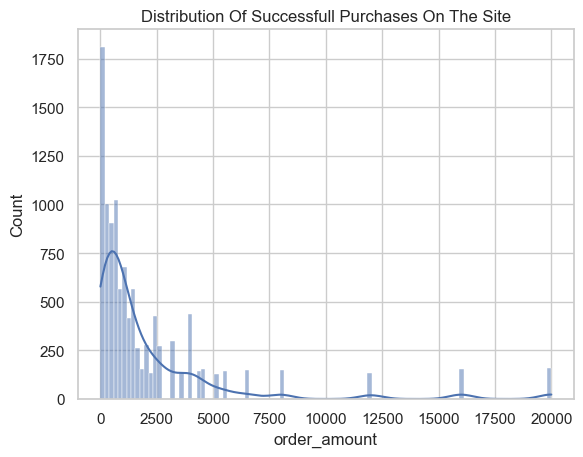

The distribution of successful order amounts is right-skewed. This suggests that there are more customers spending smaller amounts, while fewer customers spend significantly larger sums. For a store like ShopSmart, a left-skewed distribution would be more desirable

In [688]:
#distribution of order amount
sns.histplot(df_checkout_success["order_amount"],kde=True)
plt.title("Distribution Of Successfull Purchases On The Site")
plt.show()
printmd("The distribution of successful order amounts is right-skewed. This suggests that there are more customers spending smaller amounts, while fewer customers spend significantly larger sums. For a store like ShopSmart, a left-skewed distribution would be more desirable")

### 4.1.6.5 Top product by Revenue generated
from our analysis, we already know the top product by site interaction is Canon EOS R5 Camera, lets take alook at the top product by revenue generated

,name,order_amount
0,Canon EOS R5 Camera,8923977.69
1,Dell XPS 13 Laptop,2805378.42
2,iPhone 13,2378178.38
3,Samsung Galaxy S21,1952078.31
4,Samsung 55-Inch 4K Smart TV,1674379.07
5,Microsoft Xbox Series X,1081978.36
6,Sony PlayStation 5,1055978.88
7,Sony WH-1000XM4 Headphones,745828.69
8,Nintendo Switch,567281.09
9,Apple AirPods Pro,544728.21


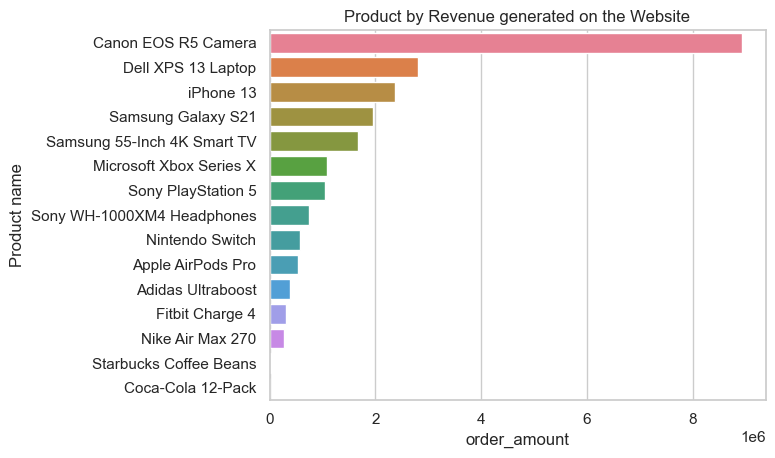

**Canon EOS R5 Camera** generated the most revenue to the tune of **$8,923,978** while **Coca-Cola 12-Pack** generated the least revenue at $12,722 

In [689]:
#grouping by product name and finding the sum
df_product=df_checkout_success.groupby("name")["order_amount"].sum().sort_values(ascending=False).reset_index()
display(df_product)
sns.barplot(y='name', x='order_amount', hue='name', data=df_product)
plt.title('Product by Revenue generated on the Website')
plt.ylabel("Product name")
plt.show()
printmd(f"**{df_product["name"].iloc[0]}** generated the most revenue to the tune of **${"{:,}".format(round(df_product["order_amount"].iloc[0]))}** while **{df_product["name"].iloc[-1]}** generated the least revenue at $12,722 ")

### 4.1.6.6 Top product by Quantity sold
Due to the difference in prices of items on the site, the item that generates the most revenue might not be the most sold item. Lets find out.

,name,quantity
0,Canon EOS R5 Camera,2231
1,Apple AirPods Pro,2179
2,Adidas Ultraboost,2178
3,Samsung Galaxy S21,2169
4,Microsoft Xbox Series X,2164
5,iPhone 13,2162
6,Dell XPS 13 Laptop,2158
7,Nike Air Max 270,2155
8,Sony WH-1000XM4 Headphones,2131
9,Coca-Cola 12-Pack,2124


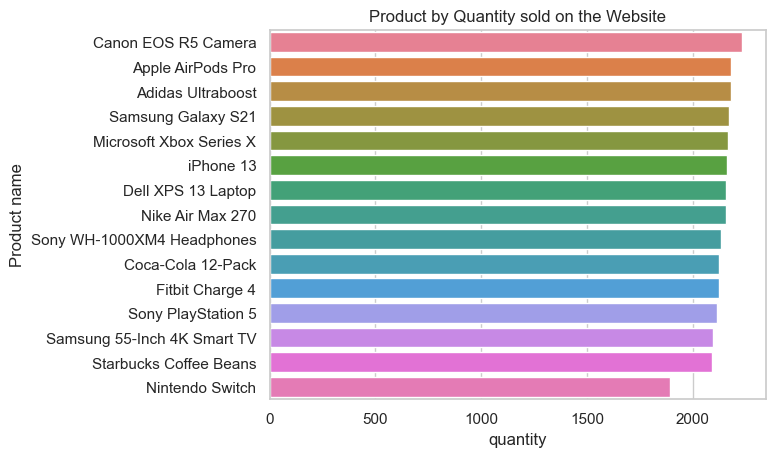

**2,231** units of **Canon EOS R5 Camera** was sold which also generated the most revenue.**Nintendo Switch** sold the least amount of units 

In [690]:
#grouping by product name and finding the sum
df_product=df_checkout_success.groupby("name")["quantity"].sum().sort_values(ascending=False).reset_index()
display(df_product)
sns.barplot(y='name', x='quantity', hue='name', data=df_product)
plt.title('Product by Quantity sold on the Website')
plt.ylabel("Product name")
plt.show()
printmd(f"**{"{:,}".format(round(df_product["quantity"].iloc[0]))}** units of **{df_product["name"].iloc[0]}** was sold which also generated the most revenue.**Nintendo Switch** sold the least amount of units ")

## 4.2 Geographical Location
We have explored customer visits and its relationship with ShopSmart revenue. Let us now explore the Gegraphical location of ShopSmart customers

### 4.2.1 Customer location
lets look at where customers interact with ShopSmart site the most

,location,count
0,Korea,6997
1,Argentina,4507
2,Mauritius,4414
3,Jersey,4130
4,Panama,3936
...,...,...
238,Chad,1082
239,Malaysia,1037
240,Austria,921
241,Italy,783


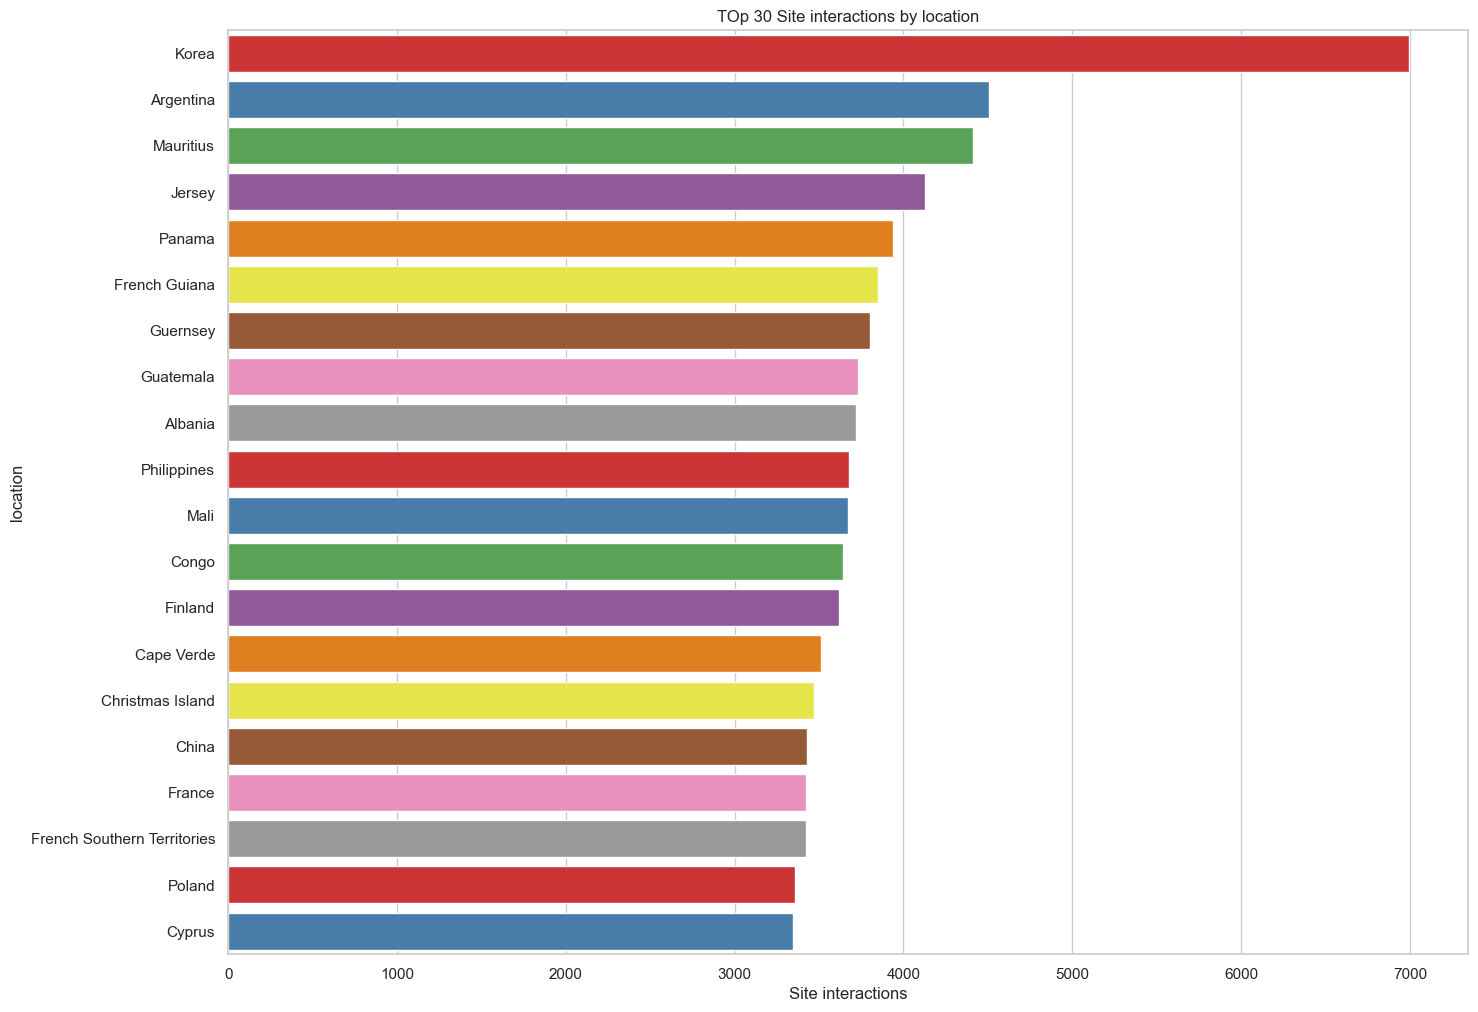

The country with the most site interaction is **Korea** with 6,997 site interaction

In [691]:
df_location=df["location"].value_counts().reset_index()
display(df_location)
#bar plot of location of site interactions
plt.figure(figsize=(16, 12))
sns.barplot(df_location.head(20),x="count",y="location",hue="location",legend=False,palette="Set1").set_xlabel('Site interactions')
plt.title('TOp 30 Site interactions by location')
plt.show()
printmd("The country with the most site interaction is **Korea** with 6,997 site interaction")


### 4.2.2 Revenue by Location

lets take a look at revenue by location

,location,order_amount
0,Singapore,252274.67
1,Korea,247149.42
2,Mauritius,241841.76
3,Bosnia and Herzegovina,222098.53
4,Rwanda,217881.10
5,Albania,215551.59
6,North Macedonia,213966.26
7,Thailand,207553.03
8,Kuwait,202260.17
9,Fiji,196151.12


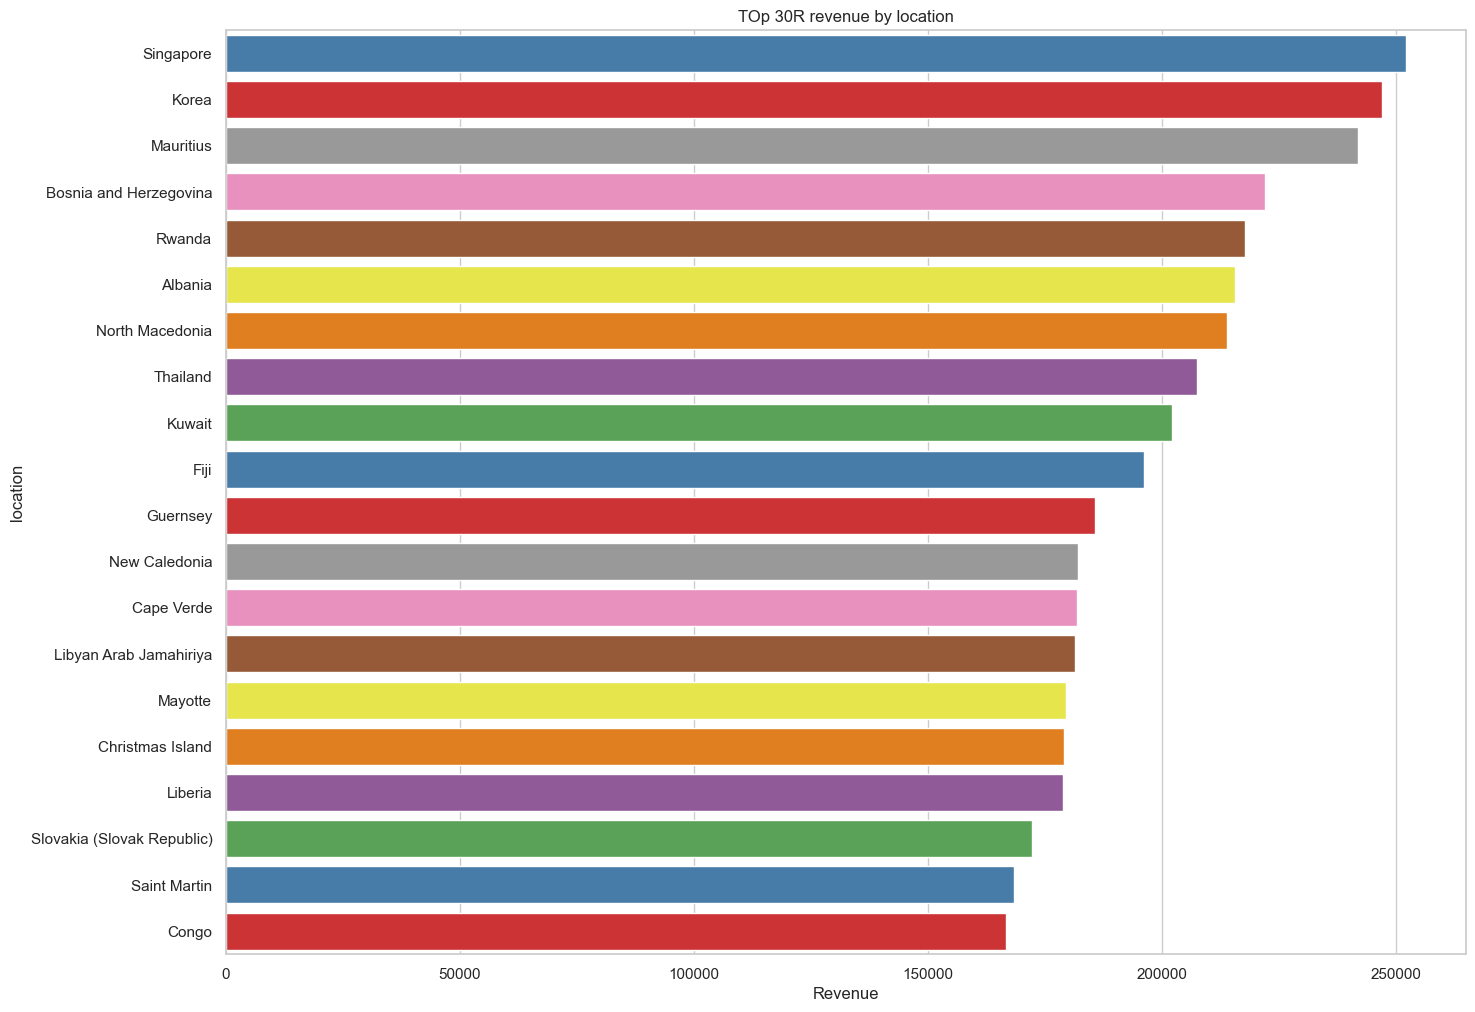

**Singapore** emerges as the standout revenue contributor among all countries, with an impressive **$252,275**. In stark contrast, **Slovenia** trails behind, generating a mere **$180**. To unlock growth opportunities, we must direct our attention to countries with high     interaction levels but currently low revenue. Interestingly, **Argentina** ranks second in site interactions but fails to translate that         into substantial revenue. Focusing on these interaction-rich yet underperforming markets is crucial.

In [692]:
df_country=df_checkout_success.groupby("location")["order_amount"].sum().sort_values(ascending=False).reset_index()
display(df_country.head(20))
#bar plot of location of site interactions
plt.figure(figsize=(16, 12))
sns.barplot(df_country.head(20),y="location",x="order_amount",hue="order_amount",legend=False,palette="Set1").set_xlabel('Revenue')
plt.title('TOp 30R revenue by location')
plt.show()
printmd("**Singapore** emerges as the standout revenue contributor among all countries, with an impressive **$252,275**. In stark contrast\
, **Slovenia** trails behind, generating a mere **$180**. To unlock growth opportunities, we must direct our attention to countries with high\
     interaction levels but currently low revenue. Interestingly, **Argentina** ranks second in site interactions but fails to translate that\
         into substantial revenue. Focusing on these interaction-rich yet underperforming markets is crucial.")

* lets visualize it on the world map

C:\Users\Podos\AppData\Local\Temp\ipykernel_11848\2966826176.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


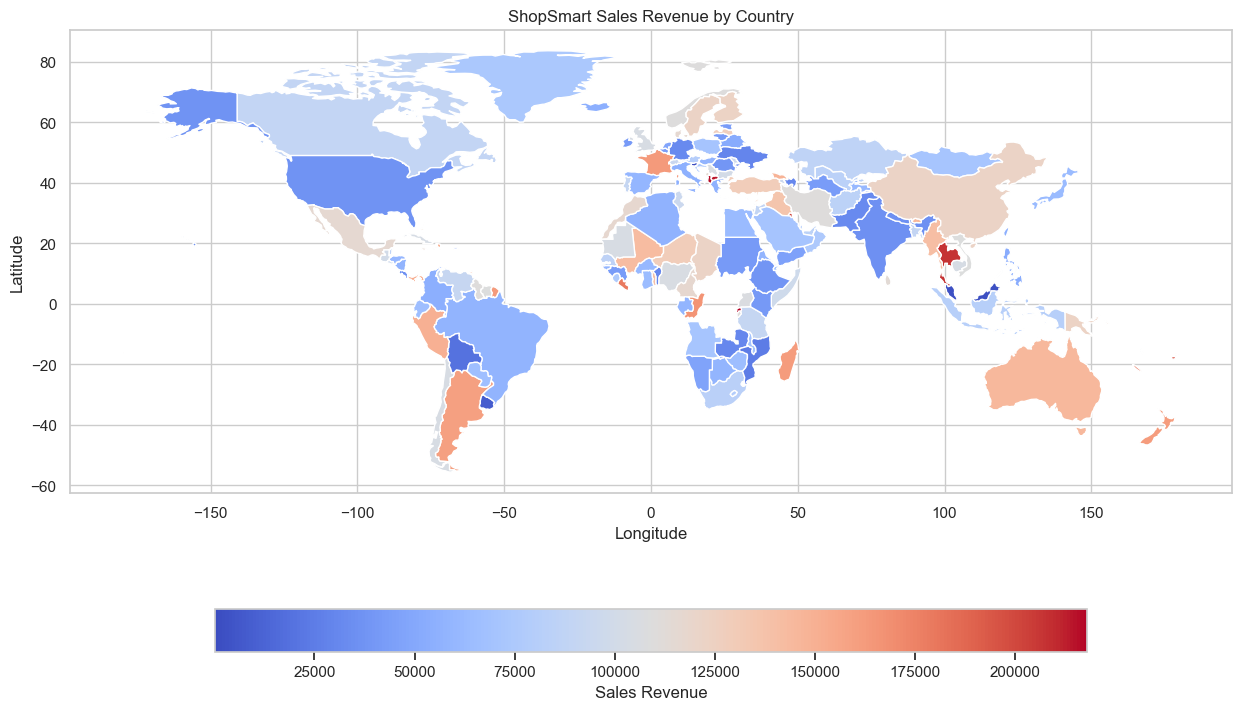

In [693]:
# Loading shapefile with region boundaries from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'location'})
# Merging df_country revenue data with the shapefile
merge = world.merge(df_country, on="location")

# Set up the figure
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the map
merge.plot(column='order_amount', cmap='coolwarm', legend=False, ax=ax)

# Add colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='horizontal', shrink=0.75)
cbar.set_label("Sales Revenue")  # Setting the label for the colorbar

# Adding title and labels
plt.title('ShopSmart Sales Revenue by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### 4.2.3 Location Revenue Statistics

* Average revenue by location

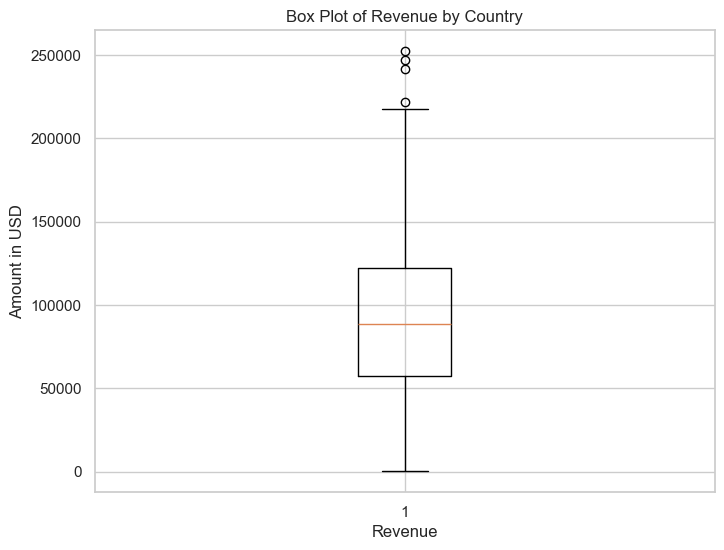

The average revenue from countries is **$93,664**, with a minimum  amount of **$180** and maximum   amount of **$252,275**. **75%** of    the orders fall below **$13,000** dollars

In [694]:
#order statistics
avg_amount_loc=df_country["order_amount"].mean()
min_amount_loc=df_country["order_amount"].min()
max_amount_loc=df_country["order_amount"].max()
plt.figure(figsize=(8, 6))  #Set the figure size

# Create the box plot
plt.boxplot(df_country["order_amount"])

# Customize the plot
plt.xlabel("Revenue")
plt.ylabel("Amount in USD")
plt.title("Box Plot of Revenue by Country")
plt.show()

printmd(f"The average revenue from countries is\
 **${"{:,}".format(round(avg_amount_loc))}**, with a minimum\
  amount of **${"{:,}".format(round(min_amount_loc))}** and maximum\
   amount of **${"{:,}".format(round(max_amount_loc))}**. **75%** of \
   the orders fall below **$13,000** dollars" )

* Distribution of renenue

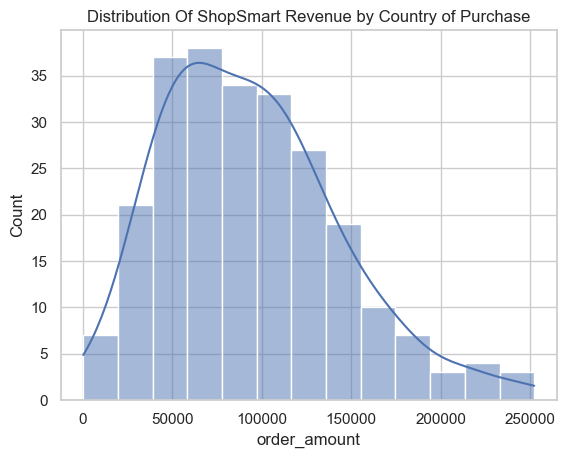

The distribution of revenue is right-skewed    . This suggests that there are more countries generating smaller amounts,         while fewer countries spend significantly larger sums

In [695]:
#distribution of order amount
sns.histplot(df_country["order_amount"],kde=True)
plt.title("Distribution Of ShopSmart Revenue by Country of Purchase")
plt.show()
printmd("The distribution of revenue is right-skewed\
    . This suggests that there are more countries generating smaller amounts,\
         while fewer countries spend significantly larger sums")

### 4.2.4 Top Selling Product by Location

lets take alook at the top selling product in top 20 country by revenue

In [696]:
top_20_countries=list(df_country.head(20)["location"])#list of top 20 contries by ShopSMart revenue
df_top_20_countries= df_checkout_success[df_checkout_success["location"].isin(top_20_countries)]#subsetting
result = df_top_20_countries.groupby(["location", "name"])["order_amount"].sum()

# Findng the item with the highest sales in each country
max_selling_item = result.groupby("location").idxmax()

# Extract the item names
most_sold_items = result.loc[max_selling_item]

# Display the result
display(most_sold_items.reset_index())
printmd("we already discoverd that the **Canon EOS R5 Camera** is the top selling product by \
    sales revenue and now it can be seen that its the top\
        selling product in 19 of the 20 top countries")

,location,name,order_amount
0,Albania,Canon EOS R5 Camera,87999.78
1,Bosnia and Herzegovina,Canon EOS R5 Camera,111999.72
2,Cape Verde,Canon EOS R5 Camera,79999.80
3,Christmas Island,Canon EOS R5 Camera,83999.79
4,Congo,Canon EOS R5 Camera,79999.80
5,Fiji,Canon EOS R5 Camera,95999.76
6,Guernsey,Canon EOS R5 Camera,91999.77
7,Korea,Canon EOS R5 Camera,71999.82
8,Kuwait,Canon EOS R5 Camera,91999.77
9,Liberia,Canon EOS R5 Camera,67999.83


we already discoverd that the **Canon EOS R5 Camera** is the top selling product by     sales revenue and now it can be seen that its the top        selling product in 19 of the 20 top countries

# 5 Insights

The exploratory data analysis of the ShopSMart data revealed the following actionable insights:

* **Uniform Engagement Distribution:**<br>
Initially, customer engagement with the website was evenly distributed.
However, there was a significant surge in site activities starting on the 29th.
Investigate the cause of this sudden increase and consider amplifying the actions that led to it.

* **Top-Performing Product:**<br>
The Canon EOS R5 Camera emerged as the top performer, leading in customer interactions, unit sales, and revenue generation. This product drew an impressive 39,715 interactions and amassed a staggering $8,923,978 in revenue. In contrast, the Nintendo Switch, despite being the least sold item, still managed to earn a commendable $567,281. The Coca-Cola 12-pack, even though it sold 2124 units, generated the lowest revenue at $12,722.76. The store should capitalize on the popularity of the Canon EOS R5 camera to boost revenue, while also ramping up marketing efforts for the Nintendo Switch and Coca-Cola 12-pack.

* **Average Interaction Duration:**<br>
On average, customers spent 4.0 days interacting with the site.
Use this insight to optimize user experience and encourage longer engagement.

* **Order Success Rate Optimization:**<br>
Currently, successful orders account for only 33.3% of all orders on the site.
Efforts should be made to increase this percentage and improve order success rates.

* **Revenue and Loss Insights**:<br>
The store revenue during the dataset period was $22,760,347.
However, $44,682,020 in potential revenue was lost due to failed and canceled orders.
Focus on minimizing failed/canceled orders to maximizing revenue.

* **Spending Distribution**:<br>
The average amount spent by customers is $2,133.
While most customers spend below $2,500, there are outliers with significantly larger spending.
Consider strategies to attract more high-spending customers.

* **Revenue from Countries**:<br>
The average revenue from countries is $93,664.
Singapore emerges as the standout revenue contributor, generating an impressive $252,275.
Conversely, Slovenia trails behind, contributing a mere $180.
Focus on underperforming markets with high interaction levels (e.g., Argentina) to boost revenue.

* **Valued Customer Identification**:<br>
Customer bb7fd0af stands out as the most valued, spending $44,417 on the site.
Nurture relationships with high-value customers.